In [2]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import ta

In [3]:
# Load and preprocess the data
#data = pd.read_csv('/Users/saimasultana/AAPL.csv')
data = pd.read_csv(data_path)

In [4]:
# Calculate Daily Returns
data['Daily_Return'] = data['Close'].pct_change()

In [5]:
# Calculate Volatility (Standard Deviation of Daily Returns)
window_size = 20  # You can adjust the window size as needed
data['Volatility'] = data['Daily_Return'].rolling(window=window_size).std()

In [6]:
# Calculate Moving Averages
data['SMA_20'] = ta.trend.sma_indicator(data['Close'], window=20)  # 20-day Simple Moving Average
data['SMA_50'] = ta.trend.sma_indicator(data['Close'], window=50)  # 50-day Simple Moving Average

In [7]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [8]:
# Assuming you want to predict the 'Close' price based on other columns
# Let's create a train-test split
#X = data.drop(columns=['Close', 'Date'])
#y = data['Close']

# Select Features
features = ['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50', 'Volatility']  # Select relevant features
X = data[features]
y = data['Close']  # Predicting the closing price




In [9]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]})

In [13]:
# Best hyperparameters
best_params = grid_search.best_params_

In [14]:
# Train the SVM model with the best hyperparameters
best_svm_model = SVR(kernel='rbf', **best_params)
best_svm_model.fit(X_train_scaled, y_train)

SVR(C=10, gamma=0.01)

In [15]:
# Make predictions
y_pred = best_svm_model.predict(X_test_scaled)

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
SVM_rmse = mse ** 0.5
SVM_r2 = r2_score(y_test, y_pred)

In [17]:
# Print the evaluation results
print("Root Mean Squared Error:", SVM_rmse)
print("R-squared:", SVM_r2)

Root Mean Squared Error: 0.19772292045129486
R-squared: 0.9967761087847954


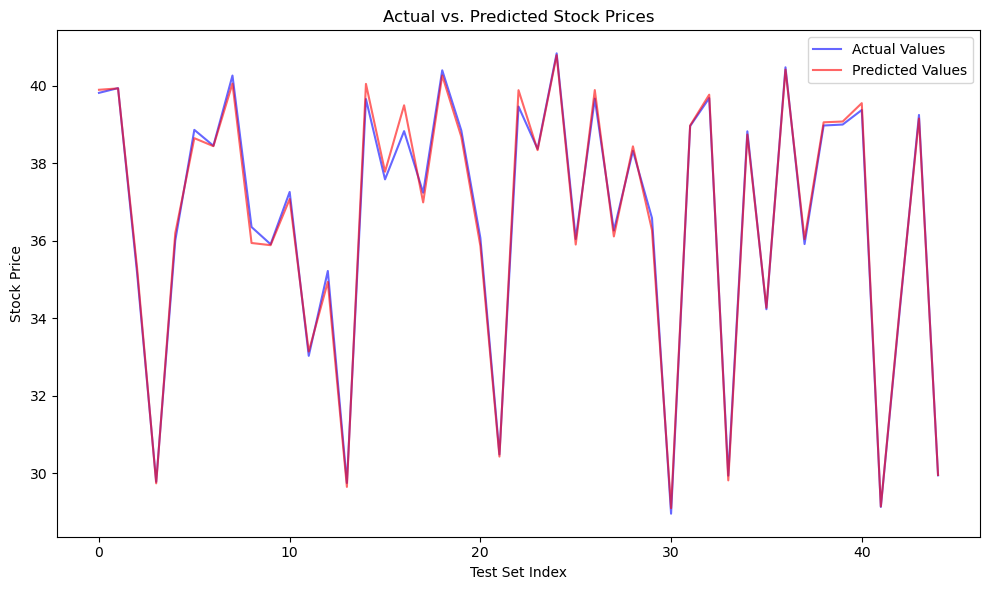

In [18]:
# Plotting the actual vs. predicted values 
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Values', color='red', alpha=0.6)
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Test Set Index')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()
